In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving carprices.csv to carprices.csv


In [4]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('carprices.csv')

In [6]:
df

,Car_Model,Mileage,Sell_Price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [7]:
dummies=pd.get_dummies(df['Car_Model'])

In [8]:
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [10]:
merged=pd.concat([df,dummies],axis='columns')

In [11]:
merged

,Car_Model,Mileage,Sell_Price,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [12]:
final=merged.drop(['Car_Model'],axis='columns')

In [13]:
y=final['Sell_Price']

In [14]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price, dtype: int64

In [17]:
X= final[['Mileage', 'Age(yrs)', 'BMW X5', 'Audi A5' ,'Mercedez Benz C class']]

In [18]:
final.shape

(13, 6)

In [19]:
final.columns

Index(['Mileage', 'Sell_Price', 'Age(yrs)', 'Audi A5', 'BMW X5',
       'Mercedez Benz C class'],
      dtype='object')

In [21]:
X

,Mileage,Age(yrs),BMW X5,Audi A5,Mercedez Benz C class
0,69000,6,1,0,0
1,35000,3,1,0,0
2,57000,5,1,0,0
3,22500,2,1,0,0
4,46000,4,1,0,0
5,59000,5,0,1,0
6,52000,5,0,1,0
7,72000,6,0,1,0
8,91000,8,0,1,0
9,67000,6,0,0,1


In [22]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [23]:
#Train Model 
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
reg.predict(X_test)

array([23361.78247734, 41161.70694864, 29076.13293051, 18013.29305136])

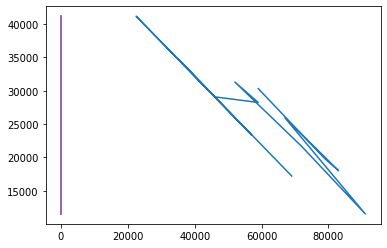

In [29]:
#best fit line
plt.plot(X,reg.predict(X))

In [26]:
reg.coef_

array([-4.37915408e-01, -8.97280967e+02, -4.52613293e+03,  1.22039275e+03,
        3.30574018e+03])

In [27]:
reg.intercept_

57335.498489426

In [28]:
reg.score(X_test,y_test)

0.913574973121789